In [1]:
cd ..

/media/sanjyot/DATA/UMich google drive/Academics/Fall 2020/Data Security and Privacy - CIS 545/project/EvaluatingDPML


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [4]:
import numpy as np

from attack import load_data, train_target_model, yeom_membership_inference
from sklearn.metrics import roc_curve, auc, accuracy_score
from utilities import log_loss
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
DATA_PATH = 'data/'
data_name = 'target_data.npz'

In [6]:
class Args:
    train_dataset = None
    run = 1
    use_cpu = 0
    save_model = 0
    save_data = 0
    n_shadow = 5
    target_data_size = 1e4
    target_test_train_ratio = 1
    target_model = 'nn'
    target_learning_rate = 0.01
    target_batch_size = 200
    target_n_hidden = 256  # 256
    target_epochs = 50
    target_l2_ratio = 1e-8
    target_clipping_threshold = 1
    target_privacy = 'no_privacy'
    target_dp = 'dp'
    target_epsilon = 0.5
    target_delta = 1e-5
    attack_model = 'softmax'
    attack_learning_rate = 0.01
    attack_batch_size = 100
    attack_n_hidden = 64
    attack_epochs = 100
    attack_l2_ratio = 1e-6
    
args = Args()

In [7]:
dataset = load_data(data_name, args)
train_x, train_y, test_x, test_y = dataset

In [8]:
true_x = np.vstack((train_x, test_x))
true_y = np.append(train_y, test_y)

## Non private original target model architecture

In [9]:
pred_y, membership, test_classes, classifier, aux = train_target_model(
        args=args,
        dataset=dataset,
        epochs=args.target_epochs,
        batch_size=args.target_batch_size,
        learning_rate=args.target_learning_rate,
        clipping_threshold=args.target_clipping_threshold,
        n_hidden=args.target_n_hidden,
        l2_ratio=args.target_l2_ratio,
        model=args.target_model,
        privacy=args.target_privacy,
        dp=args.target_dp,
        epsilon=args.target_epsilon,
        delta=args.target_delta,
        save=args.save_model)

Using model nn
Train loss after 1 epochs is: 3.669
Train loss after 2 epochs is: 3.330
Train loss after 3 epochs is: 3.102
Train loss after 4 epochs is: 2.817
Train loss after 5 epochs is: 2.549
Train loss after 6 epochs is: 2.356
Train loss after 7 epochs is: 2.053
Train loss after 8 epochs is: 1.819
Train loss after 9 epochs is: 1.580
Train loss after 10 epochs is: 1.391
Train loss after 11 epochs is: 1.179
Train loss after 12 epochs is: 0.974
Train loss after 13 epochs is: 0.811
Train loss after 14 epochs is: 0.726
Train loss after 15 epochs is: 0.597
Train loss after 16 epochs is: 0.476
Train loss after 17 epochs is: 0.358
Train loss after 18 epochs is: 0.310
Train loss after 19 epochs is: 0.287
Train loss after 20 epochs is: 0.212
Train loss after 21 epochs is: 0.165
Train loss after 22 epochs is: 0.125
Train loss after 23 epochs is: 0.124
Train loss after 24 epochs is: 0.084
Train loss after 25 epochs is: 0.067
Train loss after 26 epochs is: 0.047
Train loss after 27 epochs is: 0

In [10]:
train_loss, train_acc, test_loss, test_acc = aux
print(f'Train accuracy: {train_acc:.3}')
print(f'Test accuracy: {test_acc:.3}')

Train accuracy: 1.0
Test accuracy: 0.168


In [11]:
per_instance_loss = np.array(log_loss(true_y, pred_y))
pred_membership = yeom_membership_inference(per_instance_loss, membership, train_loss)

----------YEOM'S MEMBERSHIP INFERENCE----------

TP: 7383     FP: 556     FN: 2617     TN: 9444
PPV: 0.9300
Advantage: 0.6827


PPV = Precision

Advantage = TPR - FPR


Accuracy of membership model: 0.841
Area under ROC curve: 0.955



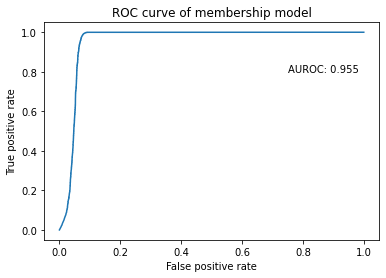

In [26]:
fpr, tpr, threshold = roc_curve(membership, -per_instance_loss, pos_label=1)
auroc = auc(fpr, tpr)

print(f'\nAccuracy of membership model: {accuracy_score(membership, pred_membership):.3}')
print(f'Area under ROC curve: {auroc:.3}\n')

plt.plot(fpr, tpr)
plt.annotate(f'AUROC: {auroc:.3}', (0.75, 0.8))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
_ = plt.title('ROC curve of membership model')

## Non private robust target model architecture

In [27]:
robust_args = Args()
robust_args.target_model = 'robust_nn'
robust_args.target_epochs = 70
robust_args.target_learning_rate = 0.001

In [28]:
pred_y, membership, test_classes, classifier, aux = train_target_model(
        args=robust_args,
        dataset=dataset,
        epochs=robust_args.target_epochs,
        batch_size=robust_args.target_batch_size,
        learning_rate=robust_args.target_learning_rate,
        clipping_threshold=robust_args.target_clipping_threshold,
        n_hidden=robust_args.target_n_hidden,
        l2_ratio=robust_args.target_l2_ratio,
        model=robust_args.target_model,
        privacy=robust_args.target_privacy,
        dp=robust_args.target_dp,
        epsilon=robust_args.target_epsilon,
        delta=robust_args.target_delta,
        save=robust_args.save_model
)

Using model robust_nn
Train loss after 1 epochs is: 4.576
Train loss after 2 epochs is: 4.477
Train loss after 3 epochs is: 4.293
Train loss after 4 epochs is: 4.138
Train loss after 5 epochs is: 4.031
Train loss after 6 epochs is: 3.958
Train loss after 7 epochs is: 3.901
Train loss after 8 epochs is: 3.856
Train loss after 9 epochs is: 3.816
Train loss after 10 epochs is: 3.782
Train loss after 11 epochs is: 3.752
Train loss after 12 epochs is: 3.725
Train loss after 13 epochs is: 3.698
Train loss after 14 epochs is: 3.673
Train loss after 15 epochs is: 3.652
Train loss after 16 epochs is: 3.634
Train loss after 17 epochs is: 3.615
Train loss after 18 epochs is: 3.600
Train loss after 19 epochs is: 3.583
Train loss after 20 epochs is: 3.569
Train loss after 21 epochs is: 3.555
Train loss after 22 epochs is: 3.541
Train loss after 23 epochs is: 3.529
Train loss after 24 epochs is: 3.515
Train loss after 25 epochs is: 3.504
Train loss after 26 epochs is: 3.492
Train loss after 27 epoch

In [31]:
train_loss, train_acc, test_loss, test_acc = aux
print(f'Train accuracy: {train_acc:.3}')
print(f'Test accuracy: {test_acc:.3}')

Train accuracy: 0.234
Test accuracy: 0.173


In [32]:
per_instance_loss = np.array(log_loss(true_y, pred_y))
pred_membership = yeom_membership_inference(per_instance_loss, membership, train_loss)

----------YEOM'S MEMBERSHIP INFERENCE----------

TP: 5160     FP: 4061     FN: 4840     TN: 5939
PPV: 0.5596
Advantage: 0.1099



Accuracy of membership model: 0.555
Area under ROC curve: 0.576



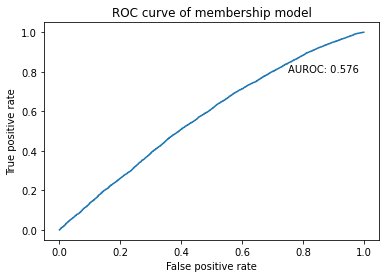

In [33]:
fpr, tpr, threshold = roc_curve(membership, -per_instance_loss, pos_label=1)
auroc = auc(fpr, tpr)

print(f'\nAccuracy of membership model: {accuracy_score(membership, pred_membership):.3}')
print(f'Area under ROC curve: {auroc:.3}\n')

plt.plot(fpr, tpr)
plt.annotate(f'AUROC: {auroc:.3}', (0.75, 0.8))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
_ = plt.title('ROC curve of membership model')